In [ ]:
# look up genes lists #

In [5]:
# get orthologs
om = read.delim('turtle/turtle_chicken_orthologs_biomart.txt', sep = '\t')
om <- om[which(om[,1]!='' & om[,2]!='' & !is.na(om[,5]) & om[,5]==1 & om[,4]=='ortholog_one2one'),]
dim(om)
om[1,]

[1] 11275     5

Gene.name Chicken.gene.name Last.common.ancestor.with.Chicken
10 ND2       ND2               Archelosauria                    
   Chicken.homology.type Chicken.orthology.confidence..0.low..1.high.
10 ortholog_one2one      1

In [1]:
t1 = read.delim('turtle/turtle_stage_gradient_exp_genes.csv', sep = ',')
t2 = read.delim('turtle/turtle_stage_upregulated_genes.csv', sep = ',')
c1 = read.delim('chicken/chicken_stage_gradient_exp_genes.csv', sep = ',')
c2 = read.delim('chicken/chicken_stage_upregulated_genes.csv', sep = ',')
t1[1,]
t2[1,]

gene stage_tau spearman inc   dec   mean_exp
1 OTX2 0.7381905 -0.5     FALSE FALSE 122.6361

gene  stage  
1 AEBP2 stage14

In [10]:
# how many genes shared?
length(intersect(t2$gene[t2$stage=='stage21'], om[match(c2$gene[c2$stage=='stage32'], om[,2]),1]))

[1] 7

In [14]:
sum(c1$inc==T)

[1] 1391

In [16]:
# how many genes shared?
length(intersect(t1$gene[t1$dec==T], om[match(c1$gene[c1$dec==T], om[,2]),1]))

[1] 114

In [20]:
library(MetaNeighbor)
load('useful_GO_terms.Rdata')
gse[1,]

GO_term    description                            N_sample N_univ
GO:0031226 GO:0031226 intrinsic component of plasma membrane 140      902   
           pvals       adj_pvals    sig 
GO:0031226 2.14535e-21 9.646676e-18 TRUE

In [27]:
aurocs = read.table("chicken_turtle_stage3_GO_aurocs.txt")
aurocs[1,]

Cardiomyocytes Endocardial Endothelial_Arterial
GO:0000187 0.704          0.638       0.61                
           Endothelial_Capillaries Endothelial_Venous Epicardium_FB.like
GO:0000187 0.607                   0.577              0.555             
           Epicardium_Meso Epicardium_Proliferating Fibroblasts
GO:0000187 0.5             0.5                      0.717      
           Immature_Cardiomyocytes Immature_Endothelium Immature_FB.like
GO:0000187 0.619                   0.712                0.507           
           Immature_Neuralcrest Lymphoid_Immune_Cells Myeloid_Immune_Cells
GO:0000187 0.5                  0.5                   0.5                 
           Neuronal_Cells Pericytes Pericytes_Stromal Smooth_Muscle_Cells
GO:0000187 0.5            0.641     0.583             0.672

Warning message in plotBPlot(as.matrix(aurocs)):
“Removing cell types with identical scores across all gene sets (cell types not present in data?): Epicardium_Meso, Epicardium_Proliferating, Immature_Neuralcrest, Lymphoid_Immune_Cells, Myeloid_Immune_Cells, Neuronal_Cells.”


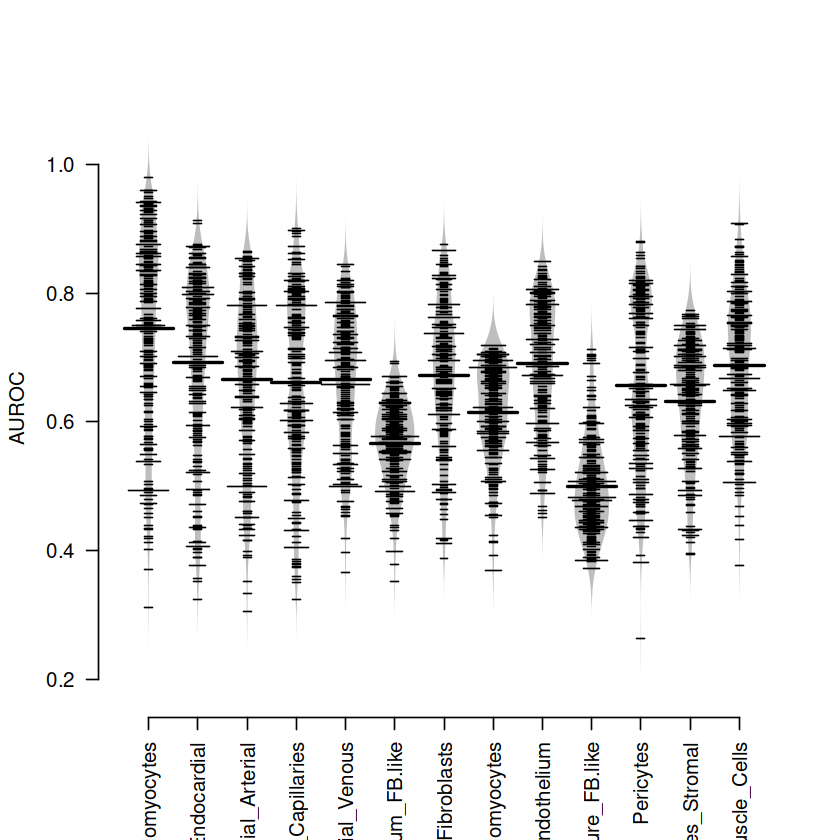

In [29]:
# pdf('aa-3.pdf', width = 10, height = 7)
plotBPlot(as.matrix(aurocs))
# dev.off()

In [50]:
a1 = read.table("chicken_stage3_GO_aurocs.txt")
a2 = read.table("turtle_stage3_GO_aurocs.txt")
df = data.frame(goterm = rownames(a1), chicken = rowMeans(a1, na.rm = T), turtle = rowMeans(a2, na.rm = T),
               cm1 = a1$Cardiomyocytes, cm2 = a2$Cardiomyocytes, icm1 = a1$Immature_Cardiomyocytes,
               icm2 = a2$Immature_Cardiomyocytes)
df$diff = df$chicken-df$turtle
df$diffcm = df$cm1-df$cm2
df$difficm = df$icm1-df$icm2

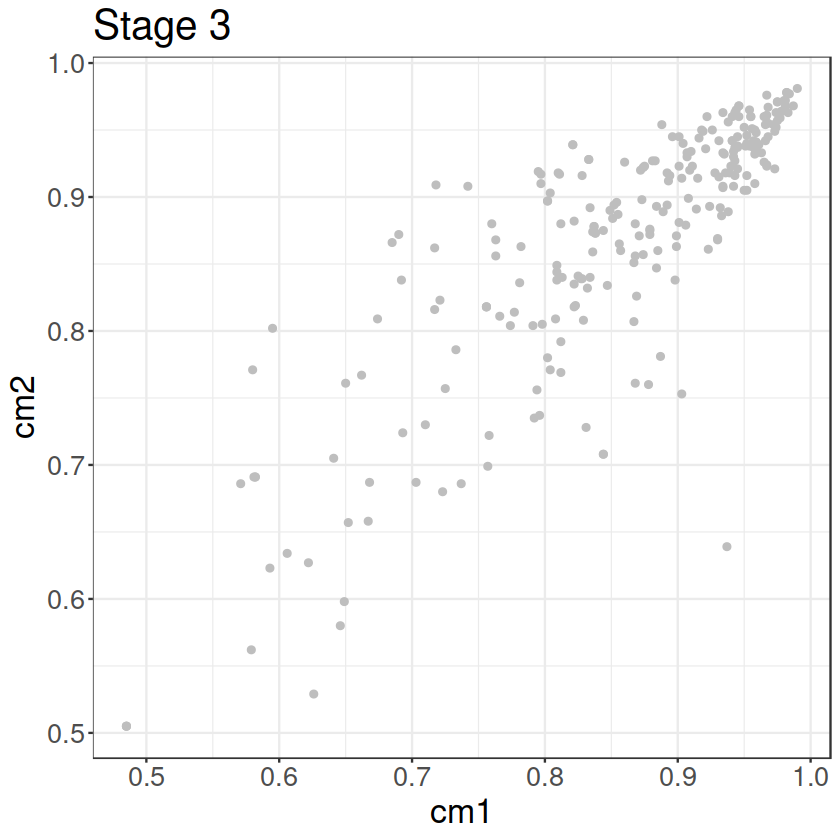

In [51]:
library(ggplot2)
# png('aaaa-3.png', width = 5, height = 5, res = 300, units = 'in')
ggplot(df, aes(x = cm1, y = cm2)) + geom_point(size = 1.5, col = '#bebebe') + theme_bw() +
ggtitle('Stage 3') + theme(text = element_text(size=20))
# dev.off()

In [72]:
# df$goterm[df$difficm>0.1]
which(gse[df$goterm[df$difficm>0.1],'N_univ']<=40)
df$goterm[df$difficm>0.1][c(14,22,29,38,81)]
gse['GO:0098870',]

[1] 14 22 28 29 38 81

[1] "GO:0009214" "GO:0015669" "GO:0019227" "GO:0032148" "GO:0098870"

GO_term    description                  N_sample N_univ pvals       
GO:0098870 GO:0098870 action potential propagation 5        10     0.0002701731
           adj_pvals   sig  
GO:0098870 0.008053097 FALSE

In [73]:
gse[gse$description=='regulation of angiogenesis',]

GO_term    description                N_sample N_univ pvals       
GO:0045765 GO:0045765 regulation of angiogenesis 24       171    0.0005448639
           adj_pvals  sig  
GO:0045765 0.01328508 FALSE

In [58]:
gse[df$goterm[df$difficm>0.1],'description']
gse[df$goterm[df$difficm< -0.1],'description']

[1] "activation of MAPK activity"                                                           
 [2] "response to acid chemical"                                                             
 [3] "ureteric bud development"                                                              
 [4] "mesonephros development"                                                               
 [5] "chondrocyte differentiation"                                                           
 [6] "metalloendopeptidase activity"                                                         
 [7] "endopeptidase inhibitor activity"                                                      
 [8] "cytokine receptor activity"                                                            
 [9] "adenylate cyclase-modulating G protein-coupled receptor signaling pathway"             
[10] "axon guidance"                                                                         
[11] "locomotory behavior"                                                                   
[12] "metallopeptidase activity"                                                             
[13] "regulation of cell size"                                                               
[14] "cyclic nucleotide catabolic process"                                                   
[15] "external side of plasma membrane"                                                      
[16] "anterior/posterior pattern specification"                                              
[17] "negative regulation of cell development"                                               
[18] "regulation of cell morphogenesis involved in differentiation"                          
[19] "negative regulation of cell morphogenesis involved in differentiation"                 
[20] "regulation of cell-substrate adhesion"                                                 
[21] "negative regulation of cell-substrate adhesion"                                        
[22] "gas transport"                                                                         
[23] "basolateral plasma membrane"                                                           
[24] "negative regulation of angiogenesis"                                                   
[25] "peptide hormone binding"                                                               
[26] "phenol-containing compound metabolic process"                                          
[27] "transmembrane receptor protein kinase activity"                                        
[28] "transmission of nerve impulse"                                                         
[29] "neuronal action potential propagation"                                                 
[30] "cAMP-mediated signaling"                                                               
[31] "cyclic-nucleotide-mediated signaling"                                                  
[32] "nerve development"                                                                     
[33] "developmental maturation"                                                              
[34] "forebrain neuron differentiation"                                                      
[35] "central nervous system neuron differentiation"                                         
[36] "extracellular matrix organization"                                                     
[37] "regulation of ossification"                                                            
[38] "activation of protein kinase B activity"                                               
[39] "positive regulation of peptidyl-serine phosphorylation"                                
[40] "multicellular organismal response to stress"                                           
[41] "regulation of Rho protein signal transduction"                                         
[42] "negative regulation of locomotion"                                                     
[43] "hormone binding"                               

[1] "excitatory extracellular ligand-gated ion channel activity"                                      
[2] "acetylcholine-gated cation-selective channel activity"                                           
[3] "excitatory synapse"                                                                              
[4] "transmitter-gated ion channel activity involved in regulation of postsynaptic membrane potential"